We are performing sentiment analysis on twitter data. we have We have been given tweets referencing several airlines and the tweets are then categorized into negative, positive or neutral.

**Objective**: The objective is to create a machine learning model through which when a tweet or text string is passed, it can categorize it into the predefined categories which are- +ve , -ve and neutral.


In [ ]:
# importing libraaries

import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from nltk.corpus import stopwords
nltk.download('punkt')
import string
nltk.download('stopwords')
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
path = "/content/drive/MyDrive/dataset/Tweets_train.csv"

df = pd.read_csv(path)

tweet = df.copy()

In [ ]:
path2 = "/content/drive/MyDrive/dataset/Tweets_dev.csv"

df_dev = pd.read_csv(path2)

tweet_dev = df_dev.copy()

df_dev.head(30)

,tweet_id,text,airline_sentiment
0,568107472260624384,@southwestair Great job celebrating #MardiGras...,positive
1,568215698524246016,@southwestair thanks for taking it up a notch!...,positive
2,567842466851905536,@USAirways Being put back on hold for what has...,negative
3,568834824410148864,@united Thank you for your offer! All sorted o...,positive
4,569590527349252096,@JetBlue wondering if it's possible for my col...,neutral
5,570211810038521856,@united common!! keep your paper work ready an...,negative
6,569273451564785664,@united I keep getting kicked to an error mess...,negative
7,567919283419742210,"@JetBlue, flights 1970, 1366, and 1552 will fl...",neutral
8,569604208661409792,@JetBlue You left 175 PEOPLE on a hot plane wi...,negative
9,570208036314222592,"@united thanks, just sent :)",positive


In [ ]:
#path3 = "/content/drive/MyDrive/dataset/Tweets_test.csv"

path3 = "/content/drive/MyDrive/dataset/New_Tweets_test-1.csv"


df_test = pd.read_csv(path3)


tweet_test = df_test.copy()

In [ ]:
df_test.shape

(1464, 4)

In [ ]:
df_dev.shape

(1318, 3)

In [ ]:
df.shape


(11858, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           11858 non-null  int64 
 1   text               11858 non-null  object
 2   airline_sentiment  11858 non-null  object
dtypes: int64(1), object(2)
memory usage: 278.0+ KB


In [ ]:
# unique values
df.nunique()

tweet_id             11757
text                 11713
airline_sentiment        3
dtype: int64

In [ ]:
# isnull values
df.isnull().sum()


tweet_id             0
text                 0
airline_sentiment    0
dtype: int64

# **Exploratory Data Analysis**

What we can do in this is that, we can slice the string with @ so that all the mentions of the flight are sliced and put into a list and added to this data frame. We can then reference the airline name with the corresponding sentiment and plot a graph showing the sentimenet according to the airline.

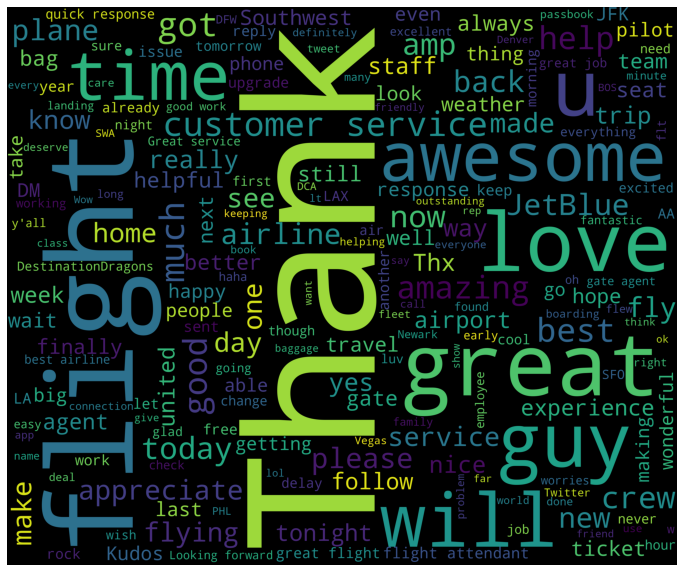

In [ ]:
# Using worldclout we can understand the 

from wordcloud import WordCloud,STOPWORDS


new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
fig = plt.gcf()
images_dir = '/content/drive/MyDrive/dataset'
fig.savefig(f"{images_dir}/word_pos.png")

In [ ]:
images_dir = '/content/drive/MyDrive/dataset'
plt.savefig(f"{images_dir}/word_pos.png")


TypeError: ignored

<Figure size 432x288 with 0 Axes>

The wordcloud shows that some of the major words associated with positive sentiment were ***[Thank, great, time, flight, best, amazing, awesome, JetBlue, helpful, nice, experience]***

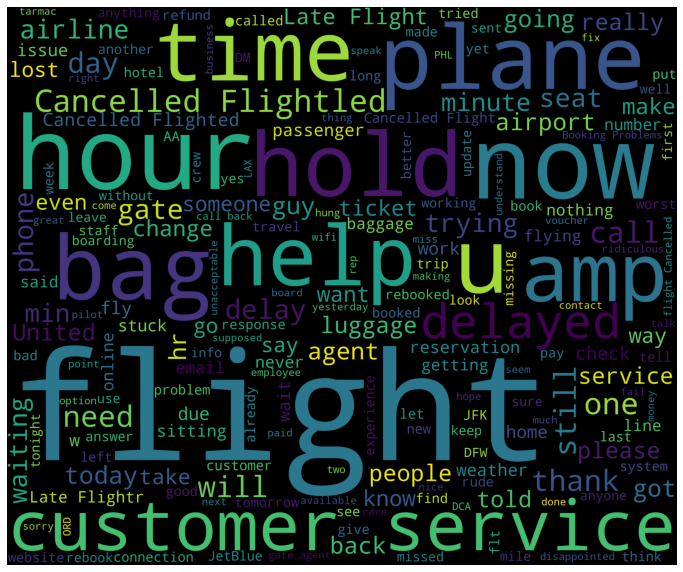

In [ ]:
new_df2 =df[df['airline_sentiment']=='negative']
words = ' '.join(new_df2['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
fig1 = plt.gcf()
images_dir = '/content/drive/MyDrive/dataset'
fig1.savefig(f"{images_dir}/word_neg.png")

The wordcloud shows that some of the major words associated with positive sentiment were ***[flight , hold, delayed, time, bag, Cancelled Flight, customer service]***

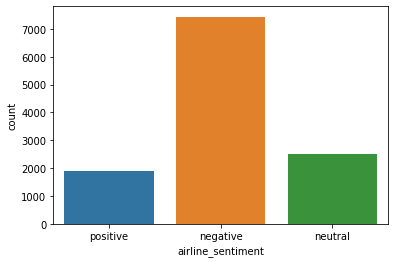

In [ ]:
import seaborn as sns

count = sns.countplot(x="airline_sentiment", data=df)

images_dir = '/content/drive/MyDrive/dataset'
plt.savefig(f"{images_dir}/sent.png")

In [ ]:
df.head(30)

,tweet_id,text,airline_sentiment
0,569179849518161920,@united you're good. Thank you!,positive
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive
3,569525116725567491,@USAirways The automated message isn't helpful...,negative
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive
5,569617089155211265,@AmericanAir just downloaded the app for iPhon...,neutral
6,568081386520723456,.@united Don't post a link to an article that ...,negative
7,570287303681294337,@JetBlue I'm not sure if you can do anything t...,neutral
8,569658686999818241,"@AmericanAir My baggage is lost, my flight Can...",negative
9,569377633894445056,@USAirways Charlotte Staff needs prayer....dis...,negative


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(df['airline_sentiment'])

df['airline_sentiment_encoded'] = enc.transform(df['airline_sentiment'])
df.head(30)

,tweet_id,text,airline_sentiment,airline_sentiment_encoded
0,569179849518161920,@united you're good. Thank you!,positive,2
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative,0
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive,2
3,569525116725567491,@USAirways The automated message isn't helpful...,negative,0
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive,2
5,569617089155211265,@AmericanAir just downloaded the app for iPhon...,neutral,1
6,568081386520723456,.@united Don't post a link to an article that ...,negative,0
7,570287303681294337,@JetBlue I'm not sure if you can do anything t...,neutral,1
8,569658686999818241,"@AmericanAir My baggage is lost, my flight Can...",negative,0
9,569377633894445056,@USAirways Charlotte Staff needs prayer....dis...,negative,0


In [ ]:
enco = LabelEncoder()
enco.fit(df_test['airline_sentiment'])

df_test['airline_sentiment_encoded'] = enco.transform(df_test['airline_sentiment'])

df_test.head(30)

,Unnamed: 0,tweet_id,text,airline_sentiment,airline_sentiment_encoded
0,0,570252000000000000,@AmericanAir I need refund.,negative,0
1,1,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,negative,0
2,2,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,positive,2
3,3,569503000000000000,@united I have never been more frustrated than...,negative,0
4,4,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",negative,0
5,5,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",positive,2
6,6,570116000000000000,@united frankly worse customer service ever. P...,negative,0
7,7,568467000000000000,@SouthwestAir you need to get your act togethe...,negative,0
8,8,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,negative,0
9,9,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,negative,0


In [ ]:
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])


def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:


df['cleaned_tweet'] = df['text'].apply(clean_the_tweet)
df['cleaned_tweet'] = df['cleaned_tweet'].apply(text_process)
df.head(10)

,tweet_id,text,airline_sentiment,airline_sentiment_encoded,cleaned_tweet
0,569179849518161920,@united you're good. Thank you!,positive,2,good thank
1,569835751275433984,"@AmericanAir way to ruin a vacation, my brothe...",negative,0,ruin vacation brother called night multiple pl...
2,568588936852799488,@JetBlue yes thankfully! Catering just got her...,positive,2,thankfully catering got loading frustrated sup...
3,569525116725567491,@USAirways The automated message isn't helpful...,negative,0,automated message helpful impossible speak hum...
4,568807823187976193,@JetBlue I'm #MakingLoveOutofNothingAtAll on m...,positive,2,makingloveoutofnothingatall brandloveaffair la...
5,569617089155211265,@AmericanAir just downloaded the app for iPhon...,neutral,1,downloaded app iphone notice drink coupon noth...
6,568081386520723456,.@united Don't post a link to an article that ...,negative,0,post link article verifies initial complaint c...
7,570287303681294337,@JetBlue I'm not sure if you can do anything t...,neutral,1,sure anything help great
8,569658686999818241,"@AmericanAir My baggage is lost, my flight Can...",negative,0,baggage lost flight cancelled flightled get ac...
9,569377633894445056,@USAirways Charlotte Staff needs prayer....dis...,negative,0,staff needs prayer disappointed response misha...


In [ ]:
df_test['cleaned_tweet'] = df_test['text'].apply(clean_the_tweet)
df_test['cleaned_tweet'] = df_test['cleaned_tweet'].apply(text_process)
df_test.head(10)

,Unnamed: 0,tweet_id,text,airline_sentiment,airline_sentiment_encoded,cleaned_tweet
0,0,570252000000000000,@AmericanAir I need refund.,negative,0,need refund
1,1,568173000000000000,@USAirways after 3 Cancelled Flightlations and...,negative,0,cancelled flightlations delay causing miss con...
2,2,569321000000000000,@JetBlue thanks so much. Can't wait to fly wit...,positive,2,much wait fly guys
3,3,569503000000000000,@united I have never been more frustrated than...,negative,0,never frustrated conversations united speak sp...
4,4,568981000000000000,"@USAirways - the worst! Hold time crazy, agent...",negative,0,worst hold time crazy agents horrible accounta...
5,5,569933000000000000,"@AmericanAir My pleasure, next AA flight - thi...",positive,2,pleasure next aa flight wednesday milan italy ...
6,6,570116000000000000,@united frankly worse customer service ever. P...,negative,0,worse customer service ever problems happen de...
7,7,568467000000000000,@SouthwestAir you need to get your act togethe...,negative,0,need get act together new morning plane malfun...
8,8,570280000000000000,@AmericanAir AND they Cancelled Flighted my fl...,negative,0,cancelled flighted flight left help find hotel...
9,9,568898000000000000,@JetBlue flight 691 from bos to Tampa takeoff ...,negative,0,bos tampa takeoff min late flight




```
# This is formatted as code
```



In [ ]:
x_train = df.cleaned_tweet
y_train = df.airline_sentiment

print(len(x_train), len(y_train))

11858 11858


In [ ]:
x_test = df_test.cleaned_tweet
y_test = df_test.airline_sentiment

print(len(x_test), len(y_test))

1464 1464


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
vect = CountVectorizer()
vect.fit(x_train)

x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [ ]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

In [ ]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [ ]:
score1 = accuracy_score(y_test,pred)
score1

0.7349726775956285

In [ ]:
print(classification_report(y_test,pred))

ValueError: ignored

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB



In [ ]:
mod2 = AdaBoostClassifier()
mod2.fit(x_train_dtm , y_train)
pred2 = mod2.predict(x_test_dtm)

In [ ]:
score2 = accuracy_score(y_test, pred2)
score2

0.6666666666666666

In [ ]:
mod3 = RandomForestClassifier(n_estimators = 100)
mod3.fit(x_train_dtm , y_train)
pred3 = mod3.predict(x_test_dtm)

In [ ]:
score3 = accuracy_score(y_test, pred3)
score3

0.7219945355191257

In [ ]:
mod4 = MultinomialNB()
mod4.fit(x_train_dtm , y_train)
pred4 = mod3.predict(x_test_dtm)

In [ ]:
score4 = accuracy_score(y_test, pred4)
score4

0.7219945355191257

# **Defining Hyperparamenter tuning as a function**

In [ ]:
def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=1, scoring='accuracy')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# sklearn.metrics.SCORERS.keys()

In [ ]:
# Tuning for SVM

parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}

model_optimal = grid_search(SVC(probability=True), parameters,x_train_dtm, y_train)

In [ ]:
model_optimal = SVC()
model_optimal.fit(x_train_dtm, y_train)
#predicting output for test data
pred_opt = model_optimal.predict(x_test_dtm)

In [ ]:
scoreopt1 = accuracy_score(y_test, pred_opt)
scoreopt1

In [ ]:
# Tuning for SVM
from sklearn.svm import SVC


parameters ={
    "C":[0.01,0.5,1,2],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}

model_optimal2 = grid_search(SVC(probability=True), parameters,x_train_dtm, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


KeyboardInterrupt: ignored

In [ ]:
model_optimal2 = SVC(C = 2.0 , kernel='rbf' , gamma='scale')
model_optimal2.fit(x_train_dtm, y_train)
#predicting output for test data
pred_opt2 = model_optimal2.predict(x_test_dtm)

In [ ]:
scoreopt = accuracy_score(y_test, pred_opt2)

scoreopt

0.744535519125683

In [ ]:
data = [('Random Forest', score3),
 ('MultinomialNB',score4 ),
 ('AdaBoost',score2 ),
('SVM', score1)]

Scores_ =pd.DataFrame(data = data, columns=['Model Name','Accuracy'])
Scores_.set_index('Model Name', inplace = True)



In [ ]:
Scores_

,Accuracy
Model Name,
Random Forest,0.721995
MultinomialNB,0.721995
AdaBoost,0.666667
SVM,0.734973


In [ ]:
# Tuning for SVM
from sklearn.svm import SVC


parameters ={
    "C":[2, 2.2 , 2.1, 2.5, 1.9 ,1.8],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}

model_optimal3 = grid_search(SVC(probability=True), parameters,x_train_dtm, y_train)

In [ ]:
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import LabelEncoder

In [ ]:
text_corpus = df.text
labels_corpus = df.airline_sentiment

X_train, X_test, y_train, y_test = train_test_split(text_corpus, labels_corpus, test_size=0.25, random_state=42)

In [ ]:
# set hyperparameters
num_words=4000
maxlen=1000

In [ ]:
# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=num_words, char_level=False)

tokenizer.fit_on_texts(X_train)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

len(sequences_train)

In [ ]:
# pad sequences with 0s
X_train = pad_sequences(sequences_train, maxlen=maxlen)
X_test = pad_sequences(sequences_test, maxlen=maxlen)

print('Shape of data tensor:', X_train.shape)
print('Shape of data test tensor:', X_test.shape)
print(type(X_train))

In [ ]:
# encode target variable
label_encoder = LabelEncoder() 
y_train_label = label_encoder.fit_transform(y_train)
y_test_label = label_encoder.fit_transform(y_test)

In [ ]:
from keras import backend
import tensorflow as tf
backend.clear_session()

# set the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model(maxlen,num_words,num_categories):
    
    model = Sequential()
    
    model.add(Embedding(num_words,output_dim=100,input_length=maxlen,trainable=True))
    
    model.add(BatchNormalization())
    
    model.add(Bidirectional(LSTM(100)))
    
    model.add(Dropout(0.2))
    
    model.add(Dense(128,activation='relu'))
    
    model.add(BatchNormalization())

    model.add(Dense(64,activation='relu'))
    
    model.add(Dropout(0.2))

    model.add(Dense(32,activation='relu'))
    
    model.add(Dense(num_categories, activation='softmax'))
              
    model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    model.summary()
    return model

In [ ]:
model=create_model(maxlen,num_words,df.airline_sentiment.nunique())


In [ ]:
history = model.fit(X_train, y_train_label, epochs=5, validation_split=0.25)


In [ ]:
accuracy = model.evaluate(X_test, y_test_label, verbose=2)


In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
#converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

#calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
#creating a dictionary to map model predictions to each sentiment
class_dict = {0:'negative',
 1:'neutral',
 2:'positive'}



In [ ]:
#creating a dataframe of model predictions
df = pd.DataFrame({"Labels":y_pred_test_classes})

#replacing predictions with sentiments
label_df = df.replace({"Labels":class_dict})

#converting dataframe to array
y_pred_test_classes = label_df.to_numpy()

In [ ]:
print(classification_report(y_test, y_pred_test_classes))
